In [64]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import emcee

In [65]:
bad_samples_iso = np.load("bad_samples_iso.npy")

In [66]:
ns_iso, nw_iso, nd_iso = bad_samples_iso.shape

In [67]:
flat_bad_samples_iso = bad_samples_iso.reshape(ns_iso*nw_iso, nd_iso)

In [68]:
mini_soln_iso = [np.log10(0.048688757),2.549862293,748.5940907,5.617303041,0.002927534,0.100051148,1.070928683,0.699892835,36.61461409,37.68004929,11.37083843]

In [69]:
pos_iso = np.array(mini_soln_iso) + np.random.uniform(low=-1e-6*np.ones(len(mini_soln_iso)), high=1e-6*np.ones(len(mini_soln_iso)), size=(64,11))

In [70]:
nwalkers_iso, ndim_iso = pos_iso.shape

In [71]:
labels = ['rho_b','R_b', 'Sigma_d','R_d','rho_h','R_h','i','phi','x','y','vsys']

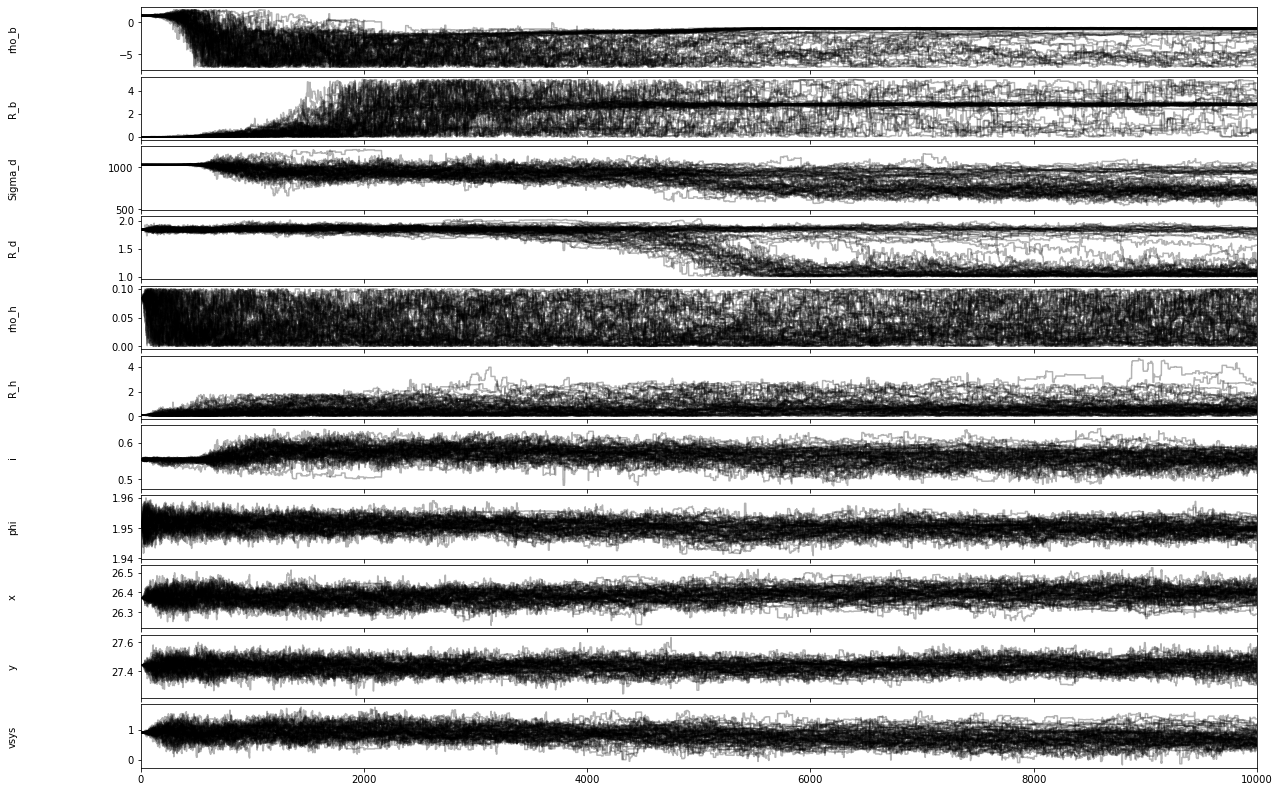

In [72]:
fig_iso, axes_iso = plt.subplots(11,1, figsize=(20, 14), sharex=True,
                         gridspec_kw={'hspace':0.1})

for i in range(ndim_iso):
    ax = axes_iso[i]
    ax.plot(bad_samples_iso[:10000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,10000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

In [73]:
good_walkers_iso = np.load("good_walkers_iso.npy")
bad_samples_iso = bad_samples_iso[:,good_walkers_iso,:]

In [74]:
flat_bad_samples_iso = bad_samples_iso.reshape(ns_iso*nw_iso, nd_iso)

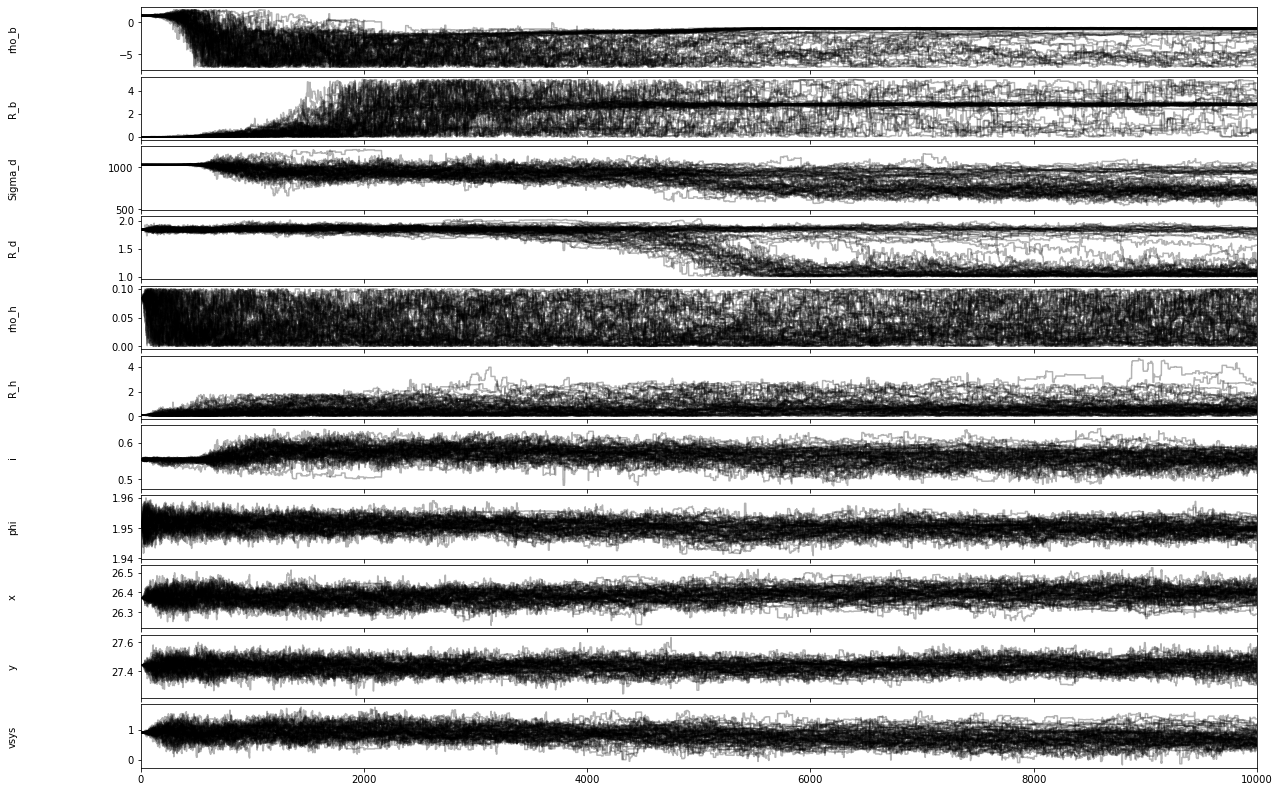

In [75]:
fig_iso, axes_iso = plt.subplots(11,1, figsize=(20, 14), sharex=True,
                         gridspec_kw={'hspace':0.1})

for i in range(ndim_iso):
    ax = axes_iso[i]
    ax.plot(bad_samples_iso[:10000,:,i], 'k', alpha=0.3)
    ax.set(xlim=(0,10000), ylabel=labels[i])
    ax.yaxis.set_label_coords(-0.11, 0.5)

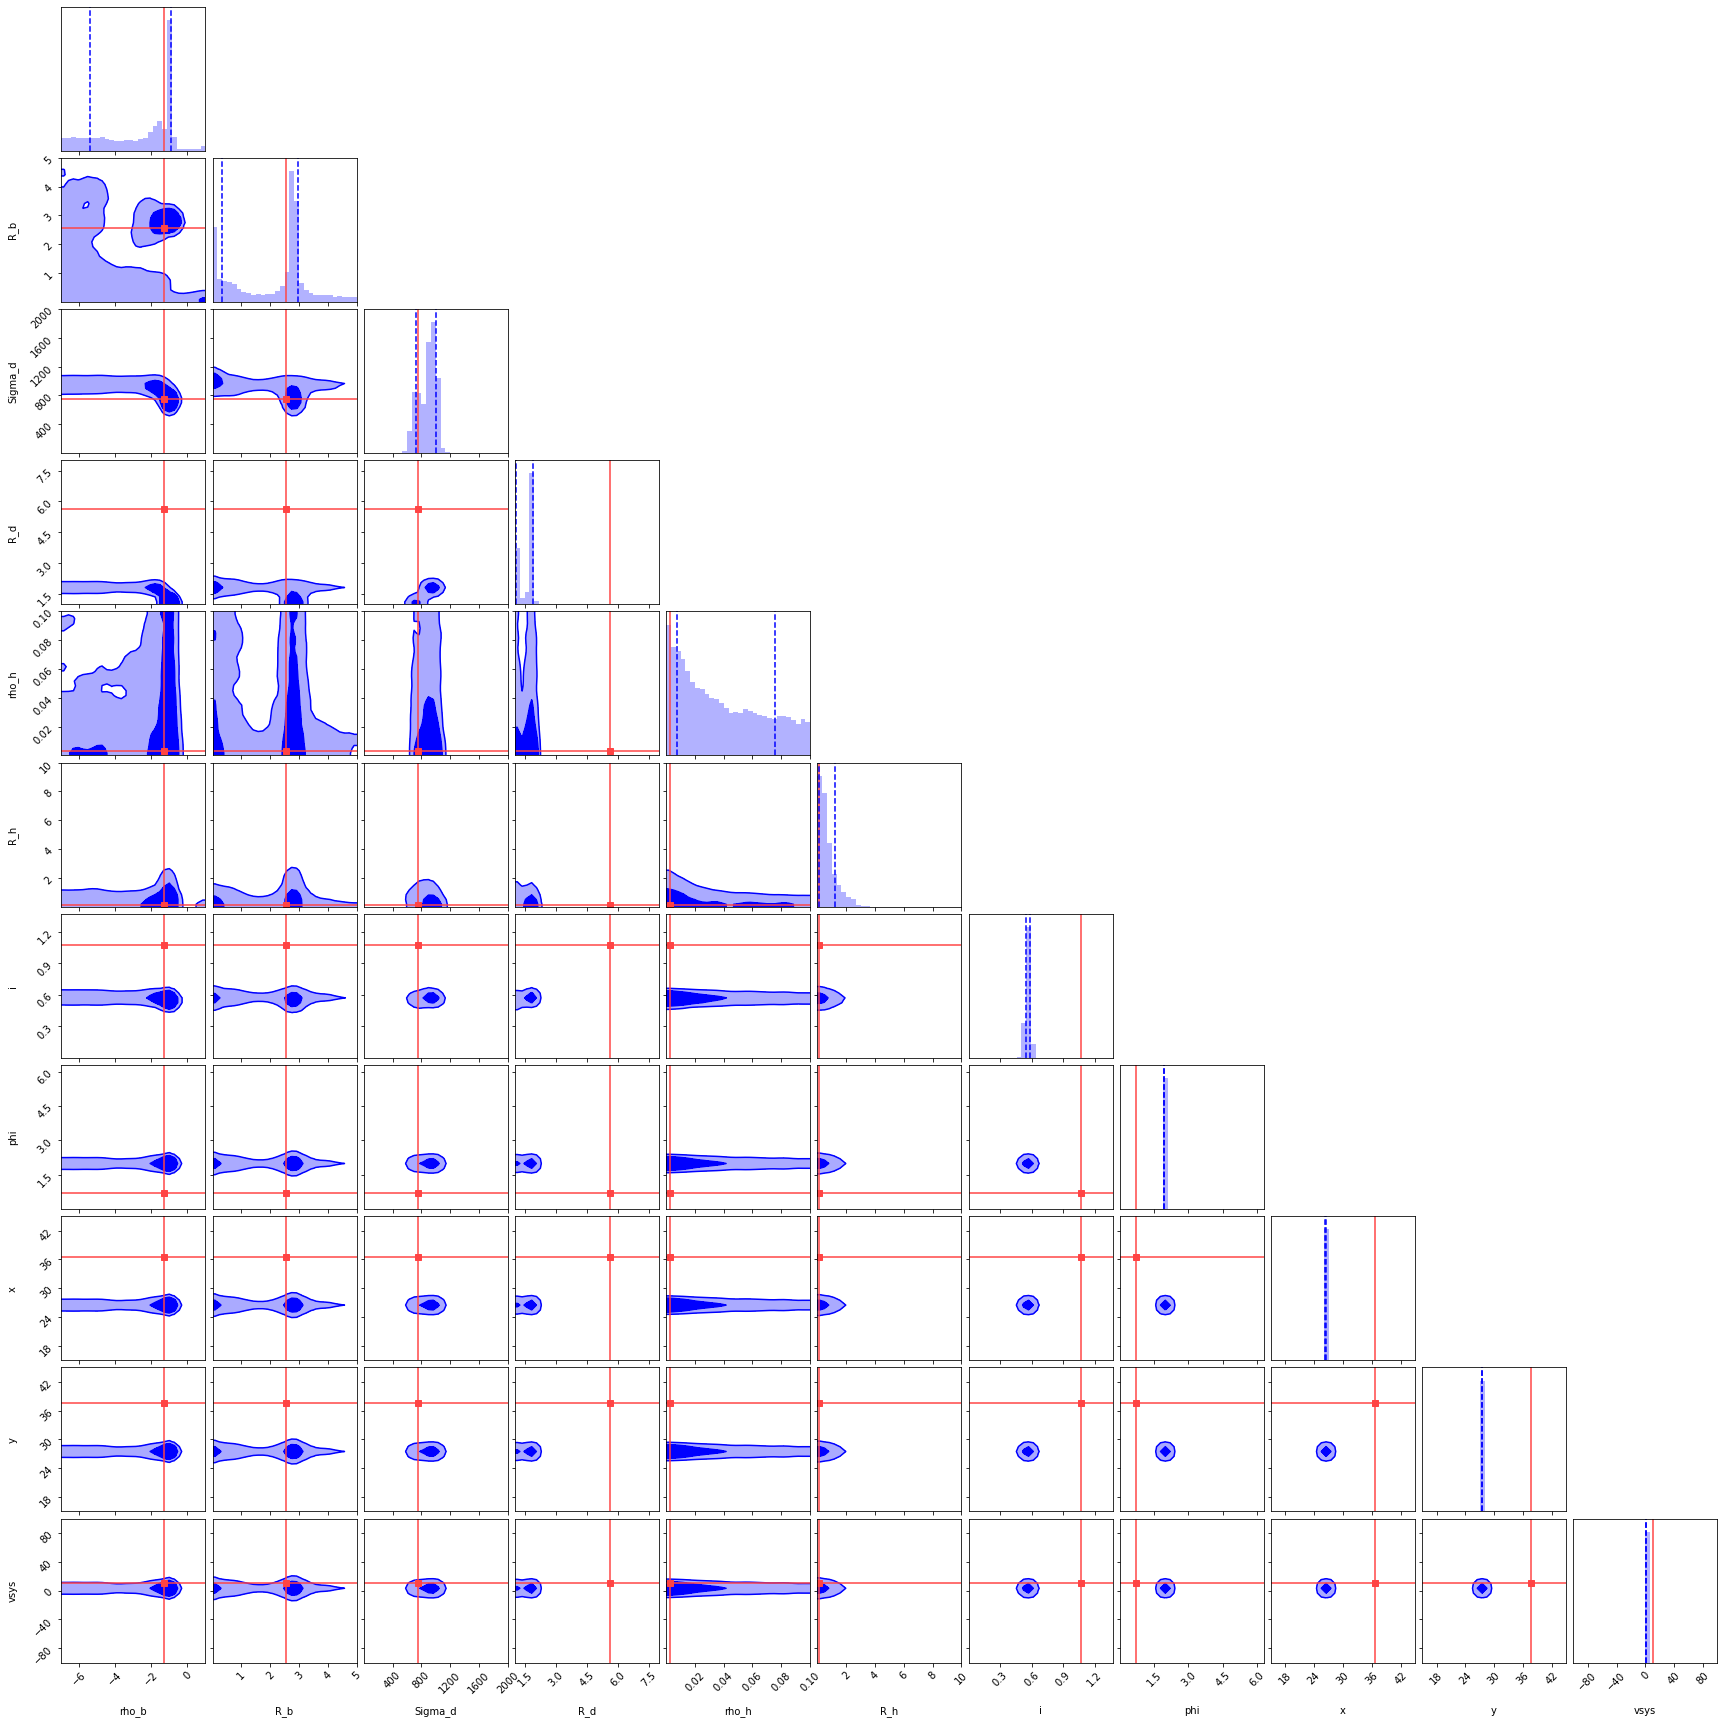

In [78]:
corner.corner(flat_bad_samples_iso, labels=labels,
                    range=[(-7,1), (0,5), (0,2000),(1,8),(0.0001,0.1),(1e-7,10),(0,0.436*np.pi),(0,2*np.pi),(15,45),(15,45),(-100,100)], bins=30,smooth=1,
                    truths=[np.log10(0.048688757),2.549862293,748.5940907,5.617303041,0.002927534,0.100051148,1.070928683,0.699892835,36.61461409,37.68004929,11.37083843], 
                    truth_color='#ff4444',
                    levels=(1-np.exp(-0.5), 1-np.exp(-2)), 
                    quantiles=(0.16, 0.84),
                    hist_kwargs={'histtype':'stepfilled', 'alpha':0.3, 'density':True},
                    color='blue', plot_datapoints=False,
                    fill_contours=True)
plt.savefig('corner_iso.png',format='png')

In [77]:
import cython

In [ ]:
from galaxy_component_functions_cython import halo_vel_iso

In [31]:
r = np.linspace(0.001,30,1000)

In [33]:
vel_list = []
for i in range(len(r)):
    vel_list.append(halo_vel_iso(r[i]*1000,0.002927534,0.100051148*1000))
vel_list

[0.007262644823640585,
 0.21918828785419464,
 0.4022429287433624,
 0.5468579530715942,
 0.6573244333267212,
 0.7416943311691284,
 0.8070653676986694,
 0.8586787581443787,
 0.900211751461029,
 0.9342257976531982,
 0.9625236392021179,
 0.9863949418067932,
 1.006779432296753,
 1.0243746042251587,
 1.0397069454193115,
 1.0531806945800781,
 1.065110206604004,
 1.0757436752319336,
 1.0852797031402588,
 1.093878149986267,
 1.1016699075698853,
 1.108762502670288,
 1.1152455806732178,
 1.1211938858032227,
 1.1266707181930542,
 1.1317296028137207,
 1.1364165544509888,
 1.1407709121704102,
 1.1448267698287964,
 1.1486135721206665,
 1.1521573066711426,
 1.1554803848266602,
 1.1586029529571533,
 1.1615424156188965,
 1.1643145084381104,
 1.1669329404830933,
 1.169410228729248,
 1.1717573404312134,
 1.1739845275878906,
 1.1761003732681274,
 1.178113341331482,
 1.1800304651260376,
 1.1818586587905884,
 1.1836036443710327,
 1.1852713823318481,
 1.1868665218353271,
 1.1883939504623413,
 1.18985772132873

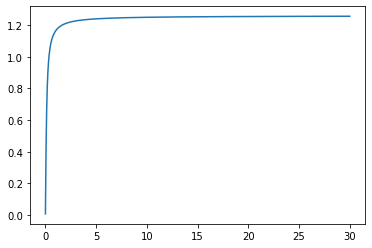

In [34]:
plt.plot(r,vel_list)

In [26]:
from galaxy_component_functions import halo_vel_iso

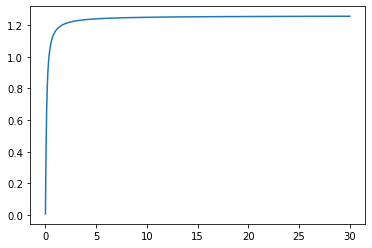

In [27]:
plt.plot(r,halo_vel_iso(r*1000,0.002927534,0.100051148*1000))